R-CNN example from Python Caffee

In [ ]:
!wget https://www.dropbox.com/s/j9b8ds6721ept0u/street_tutorial.jpeg

In [2]:
#Python Code for Region Proposal with OPenCV
import sys
import cv2
from google.colab.patches import cv2_imshow

img_path = "street_tutorial.jpeg"
im = cv2.imread(img_path)
newHeight = 400
newWidth = int(im.shape[1]*400/im.shape[0])
im = cv2.resize(im, (newWidth, newHeight))    

ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(im)

# High recall Selective Search
ss.switchToSelectiveSearchQuality()

rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))
    
numShowRects = 100
imOut = im.copy()

for i, rect in enumerate(rects):
  if (i < numShowRects):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
  else:
    break




Total Number of Region Proposals: 12606


In [ ]:
cv2_imshow(imOut)

cv2.imwrite("SS_out.jpg", imOut)

In [ ]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2.git

In [19]:
import os #just another way to navegate through folders - using python
os.chdir('/content/Mask_RCNN-TF2/')


In [ ]:
%tensorflow_version 1.x

In [ ]:
!rm model.py

In [9]:
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib
import coco
#import importlib
#importlib.reload(modellib)
from mrcnn.config import Config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version


%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

... done downloading pretrained model!


Configuaration of that dataset is in coco.py

In [ ]:
class CocoConfig(Config):
    """Configuration for training on MS COCO.
    Derives from the base Config class and overrides values specific
    to the COCO dataset.
    """
    # Give the configuration a recognizable name
    NAME = "coco"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Uncomment to train on 8 GPUs (default is 1)
    # GPU_COUNT = 8

    # Number of classes (including background)
    NUM_CLASSES = 1 + 80  # COCO has 80 classes

class InferenceConfig(CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    #RPN_NMS_THRESHOLD = 0.5
    #DETECTION_MIN_CONFIDENCE = 0.3
    #DETECTION_NMS_THRESHOLD = 0.5
    

config = InferenceConfig()
config.display()

In [ ]:
 # Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [12]:
#class names in Coco dataset
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
!wget https://www.dropbox.com/s/n3xts37k5sqfgok/street.jpg

In [ ]:
image1 = cv2.imread('street.jpg')
cv2_imshow(image1)

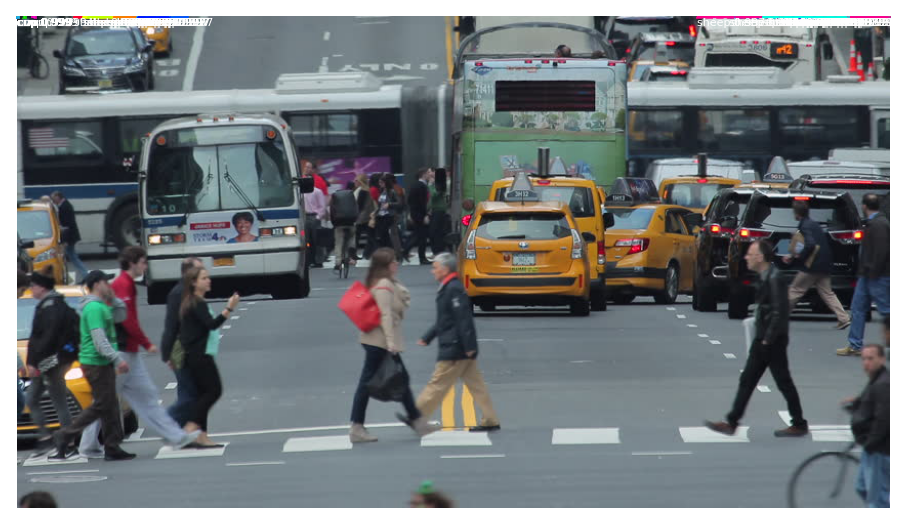

In [29]:
#visualize the image
import mrcnn
image = cv2.imread("street.jpg")
image = skimage.io.imread("street.jpg")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = model.detect([image], verbose=0)

# Visualize results
r = results[0]

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])